In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Analisis Essay Dataset

In [14]:
def read_soal(dir_csv):
    soal = pd.read_excel("../dataset/raw/"+dir_csv)
    new_names = {'No': 'no','No ': 'no', 'Soal': 'question','Soal ': 'question', 'Kunci Jawaban': 'reference_answer','Kunci Jawaban ': 'reference_answer'}
    soal = soal.rename(columns=new_names)
    return soal

In [15]:
def read_answer(data_csv, sheet_name):
    df = pd.read_excel("../dataset/raw/"+data_csv, sheet_name=sheet_name)
    new_names = {'No ': 'no','No': 'no', 'Jawaban ': 'answer','Jawaban': 'answer'}
    df = df.rename(columns=new_names)
    print(df.columns)
    df = df.drop(columns=['Siswa ', 'no'], axis=1)
    return df

In [16]:
# init dataframe
analisisEssay_df = pd.DataFrame()

In [17]:
# loop all sheet tab
sheet_name = ['Analisis_Essay_Grading_Lifestyle_568 data.xlsx', 'Analisis_Essay_Grading_Olahraga_544 data.xlsx', 'Analisis_Essay_Grading_Politik_532 data.xlsx', 'Analisis_Essay_Grading_Teknologi_515 data.xlsx']

for name in sheet_name:
    soal = read_soal(name)
    print(soal.columns)
    for i in range(1, 11):
        sheet_name = "No."+str(i)
        jawaban = read_answer(name, sheet_name)
        pertanyaan = soal[soal['no'] == i]
        result = pd.merge(pertanyaan, jawaban, how='cross')
        # result = result.drop(columns=['no'], axis=1)
        analisisEssay_df = pd.concat([analisisEssay_df, result], ignore_index=True, join='outer')
    

Index(['no', 'question', 'reference_answer', 'kategori'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2', 'score3'], dtype='object')
Index(['no', 'question', 'reference_answer', 'kategori'], dtype='object')
Index(['no', 'Siswa ', 'answer', 'score1', 'score2',

In [54]:
analisisEssay_df[['no', 'kategori']].value_counts().sort_index(level=['no', 'kategori'])

no  kategori 
1   lifestyle    57
    olahraga     56
    politik      54
    teknologi    52
2   lifestyle    57
    olahraga     55
    politik      54
    teknologi    52
3   lifestyle    57
    olahraga     57
    politik      54
    teknologi    52
4   lifestyle    57
    olahraga     56
    politik      54
    teknologi    52
5   lifestyle    57
    olahraga     55
    politik      54
    teknologi    51
6   lifestyle    57
    olahraga     55
    politik      54
    teknologi    52
7   lifestyle    57
    olahraga     54
    politik      54
    teknologi    52
8   lifestyle    57
    olahraga     52
    politik      53
    teknologi    50
9   lifestyle    56
    olahraga     51
    politik      51
    teknologi    52
10  lifestyle    56
    olahraga     53
    politik      53
    teknologi    50
Name: count, dtype: int64

In [55]:
analisisEssay_df.columns

Index(['no', 'question', 'reference_answer', 'kategori', 'answer', 'score1',
       'score2', 'score3'],
      dtype='object')

In [56]:
analisisEssay_df['avg_score'] = analisisEssay_df[['score1', 'score2', 'score3']].mean(axis=1).round(0)

In [57]:
analisisEssay_df['prompt'] = (
    "Question (Category: " + analisisEssay_df['kategori'] + "): " + analisisEssay_df['question'] + "\n"
    "Reference Answer: " + analisisEssay_df['reference_answer'] + "\n"
    "Student Answer: " + analisisEssay_df['answer'] + "\n"
    "Grading Rubric: 0-100 (where 0 is the lowest score and 100 is the highest).\n"
    "Scores given by experts: "
)

In [58]:
analisisEssay_df['prompt_length'] = analisisEssay_df['prompt'].apply(len)

In [59]:
analisisEssay_df['prompt_length'].describe()

count    2162.000000
mean      746.907956
std       338.797209
min       306.000000
25%       546.000000
50%       673.000000
75%       843.750000
max      4829.000000
Name: prompt_length, dtype: float64

In [60]:
analisisEssay_df.head()

,no,question,reference_answer,kategori,answer,score1,score2,score3,avg_score,prompt,prompt_length
0,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"sumber tenaga, pemanis alami, menjaga sistem i...",20,35,25,27.0,Question (Category: lifestyle): Jelaskan kegun...,487
1,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"sebagai sumber energi, pemanis alami, menjaga ...",18,20,25,21.0,Question (Category: lifestyle): Jelaskan kegun...,499
2,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,1. Sebagai energi. 2. Sebagai memperlancaar pe...,25,50,50,42.0,Question (Category: lifestyle): Jelaskan kegun...,512
3,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"untuk membuat kenyang, agar tidak lapar, agar ...",15,15,25,18.0,Question (Category: lifestyle): Jelaskan kegun...,493
4,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,Karbohidrat mempunyai peran penting untuk pros...,70,90,85,82.0,Question (Category: lifestyle): Jelaskan kegun...,772


In [61]:
analisisEssay_df['avg_score'].value_counts()

avg_score
23.0     78
27.0     74
28.0     73
0.0      72
100.0    62
         ..
35.0      2
79.0      2
36.0      2
99.0      2
81.0      1
Name: count, Length: 95, dtype: int64

## Score distribution plot

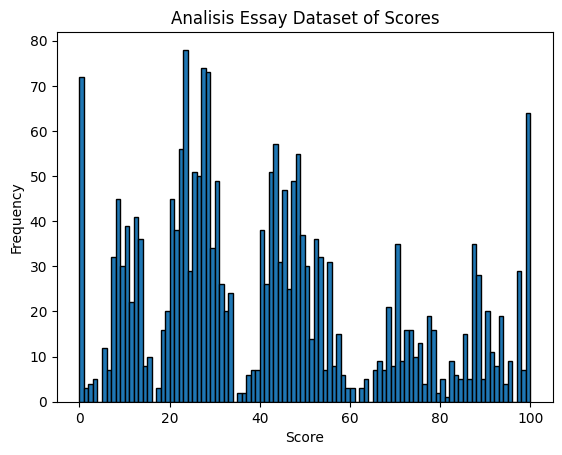

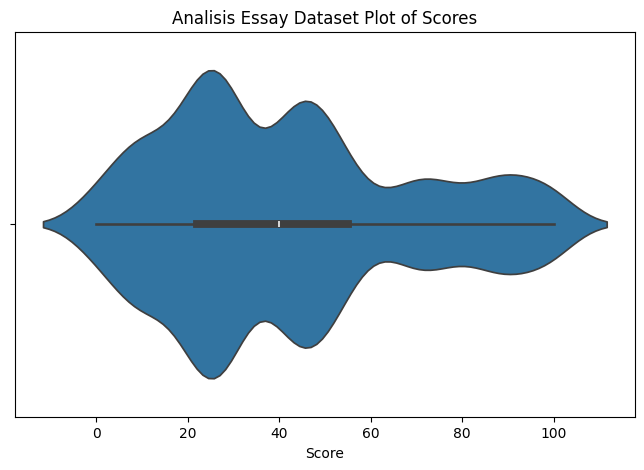

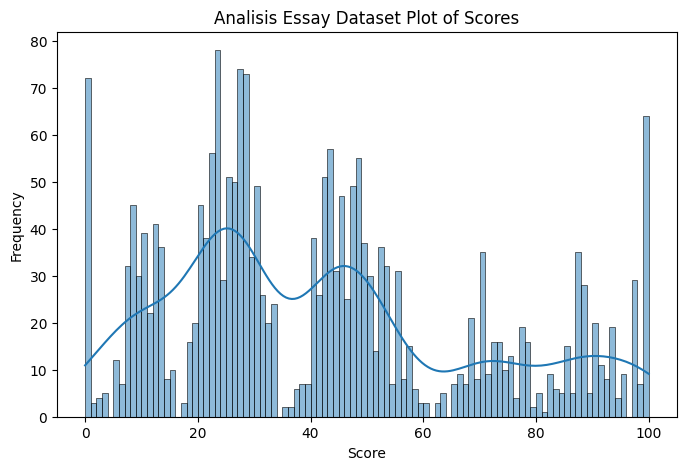

In [62]:
plt.hist(analisisEssay_df['avg_score'], bins=100, edgecolor='black')
plt.title('Analisis Essay Dataset of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(8, 5))
sns.violinplot(x=analisisEssay_df['avg_score'])
plt.title('Analisis Essay Dataset Plot of Scores')
plt.xlabel('Score')
plt.show()
plt.figure(figsize=(8, 5))
sns.histplot(analisisEssay_df['avg_score'], bins=100, kde=True, edgecolor='black')
plt.title('Analisis Essay Dataset Plot of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


## Input length plot

In [63]:
analisisEssay_df['q_length'] = analisisEssay_df['question'].apply(len)
analisisEssay_df['r_length'] = analisisEssay_df['reference_answer'].apply(len)
analisisEssay_df['a_length'] = analisisEssay_df['answer'].apply(len)
print("deskripsi question")
print(analisisEssay_df['q_length'].describe())

deskripsi question
count    2162.000000
mean       74.182239
std        29.637266
min        33.000000
25%        52.000000
50%        63.000000
75%        93.000000
max       148.000000
Name: q_length, dtype: float64


In [64]:
print("\ndeskripsi reference answer")
print(analisisEssay_df['r_length'].describe())
print("\ndeskripsi student answer")
print(analisisEssay_df['a_length'].describe())


deskripsi reference answer
count    2162.000000
mean      316.082331
std       198.844933
min        75.000000
25%       205.000000
50%       281.000000
75%       347.000000
max       918.000000
Name: r_length, dtype: float64

deskripsi student answer
count    2162.000000
mean      187.389917
std       254.229213
min         2.000000
25%        75.000000
50%       123.000000
75%       214.000000
max      4259.000000
Name: a_length, dtype: float64


### Quetion Column

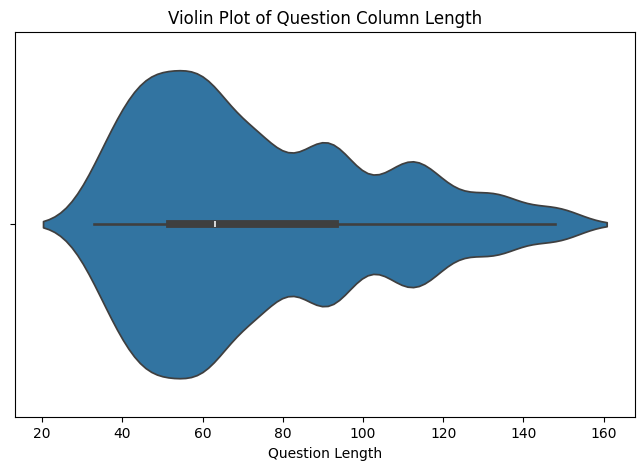

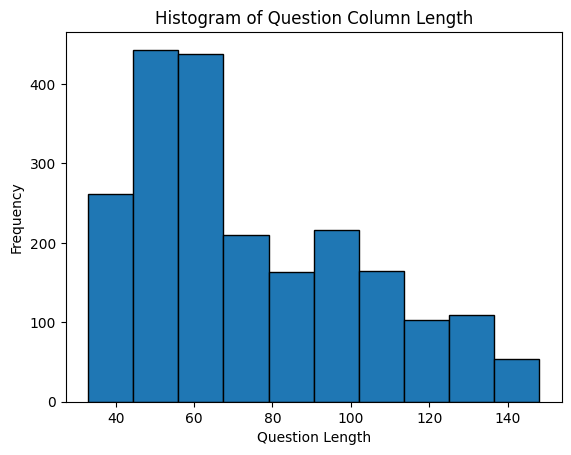

In [65]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=analisisEssay_df['q_length'])
plt.title('Violin Plot of Question Column Length')
plt.xlabel('Question Length')
plt.show()
plt.hist(analisisEssay_df['q_length'], bins=10, edgecolor='black')
plt.title('Histogram of Question Column Length')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()



### Reference answer length

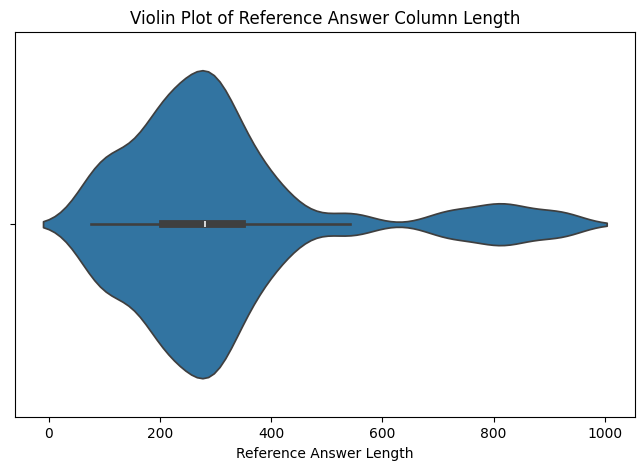

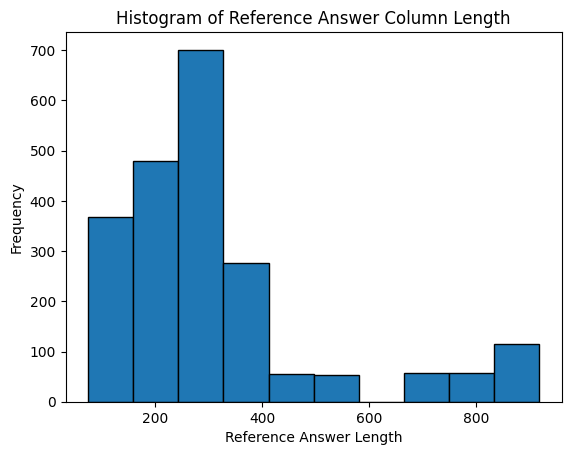

In [66]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=analisisEssay_df['r_length'])
plt.title('Violin Plot of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.show()
plt.hist(analisisEssay_df['r_length'], bins=10, edgecolor='black')
plt.title('Histogram of Reference Answer Column Length')
plt.xlabel('Reference Answer Length')
plt.ylabel('Frequency')
plt.show()

### Student Answer Length

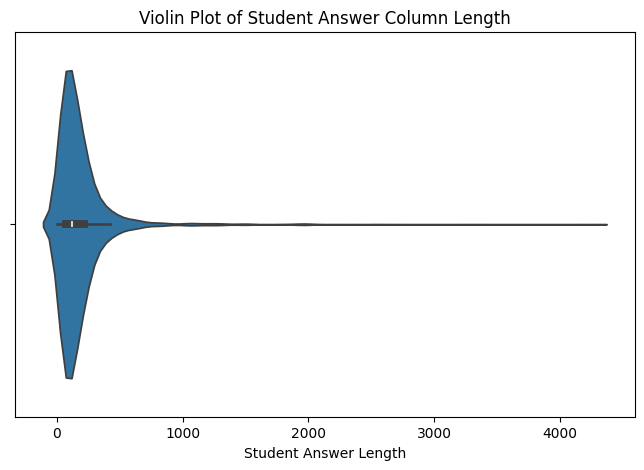

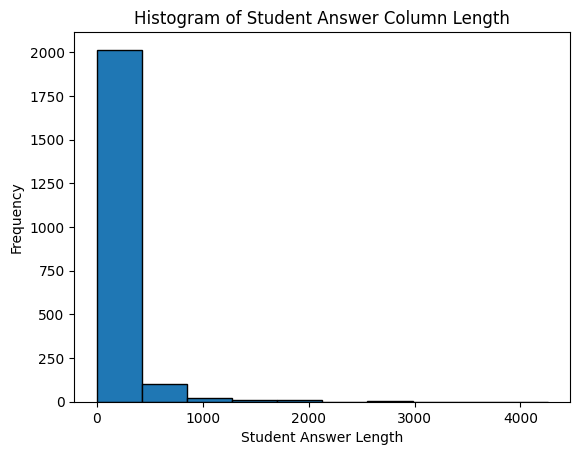

In [67]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=analisisEssay_df['a_length'])
plt.title('Violin Plot of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.show()
plt.hist(analisisEssay_df['a_length'], bins=10, edgecolor='black')
plt.title('Histogram of Student Answer Column Length')
plt.xlabel('Student Answer Length')
plt.ylabel('Frequency')
plt.show()

In [68]:
analisisEssay_df.head()

,no,question,reference_answer,kategori,answer,score1,score2,score3,avg_score,prompt,prompt_length,q_length,r_length,a_length
0,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"sumber tenaga, pemanis alami, menjaga sistem i...",20,35,25,27.0,Question (Category: lifestyle): Jelaskan kegun...,487,47,188,82
1,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"sebagai sumber energi, pemanis alami, menjaga ...",18,20,25,21.0,Question (Category: lifestyle): Jelaskan kegun...,499,47,188,94
2,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,1. Sebagai energi. 2. Sebagai memperlancaar pe...,25,50,50,42.0,Question (Category: lifestyle): Jelaskan kegun...,512,47,188,107
3,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"untuk membuat kenyang, agar tidak lapar, agar ...",15,15,25,18.0,Question (Category: lifestyle): Jelaskan kegun...,493,47,188,88
4,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,Karbohidrat mempunyai peran penting untuk pros...,70,90,85,82.0,Question (Category: lifestyle): Jelaskan kegun...,772,47,188,367


In [69]:
analisisEssay_df = analisisEssay_df.drop(columns=['score1', 'score2', 'score3', 'prompt', 'prompt_length', 'q_length', 'r_length', 'a_length'])

In [72]:
analisisEssay_df.rename(columns={'avg_score':'score'})

,no,question,reference_answer,kategori,answer,score
0,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"sumber tenaga, pemanis alami, menjaga sistem i...",27.0
1,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"sebagai sumber energi, pemanis alami, menjaga ...",21.0
2,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,1. Sebagai energi. 2. Sebagai memperlancaar pe...,42.0
3,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,"untuk membuat kenyang, agar tidak lapar, agar ...",18.0
4,1,Jelaskan kegunaan karbohidrat untuk tubuh kita.,Fungsi karbohidrat adalah sebagai pemasok ener...,lifestyle,Karbohidrat mempunyai peran penting untuk pros...,82.0
...,...,...,...,...,...,...
2157,10,Apa yang dimaksud dengan Bluetooth?,Bluetooth adalah perangkat yang menjadi media ...,teknologi,bluetooth adalah personal area network yang te...,18.0
2158,10,Apa yang dimaksud dengan Bluetooth?,Bluetooth adalah perangkat yang menjadi media ...,teknologi,spesifikasi industri untuk jaringan kawasan pr...,42.0
2159,10,Apa yang dimaksud dengan Bluetooth?,Bluetooth adalah perangkat yang menjadi media ...,teknologi,sebagai teknologi komunikasi wireless (tanpa k...,27.0
2160,10,Apa yang dimaksud dengan Bluetooth?,Bluetooth adalah perangkat yang menjadi media ...,teknologi,digunakan untuk transfer data berupa file dan ...,29.0


In [73]:
analisisEssay_df.to_csv('dataset/analisis_essay_ext.csv', index=False)